In [26]:
import numpy as np

from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Matrix Multiplication of Feature Matrix and Weight Matrix
class Matrix_Multiplication:
    def __init__(self,d,N):
        self.N = N
        self.W = np.ones([d,N])
        self.X = 0
    def ForwardPass(self,X):
        self.X = X
        return np.dot(X,self.W)
    def BackwardPass(self,grad):
        dw,dx = np.dot(self.X.T,grad),np.dot(grad,self.W.T) 
        self.W = self.W - 0.000001*dw
        return dx

# Bias Addition Layer to the Neural Network   
class Bias_Layer:
    def __init__(self,N):
        self.Y = 0
        self.B = np.array([np.ones(N)])
        self.N = N
    def ForwardPass(self,y):
        self.Y = y
        T = y.T
        L = []
        for i in range(self.N):
            L.append(T[i]+self.B[0][i])
        return np.array(L).T

    def BackwardPass(self,grad):
        dN,dB = grad,sum(grad)
        self.B = self.B - 0.000001*dB
        return dN

# Finding Mean Squared Error   
class Mean_Square_Loss:
    def __init__(self):
        self.Y = 0
        self.P = 0
    def ForwardPass(self,p,y):
        self.P = p
        self.Y = y
        return sum((p-y)**2)
    def BackwardPass(self):
        return 2*(self.P - self.Y)

# Creating the Softmax Layer, Probability Layer    
class Soft_Max:
    def __init__(self):
        self.Z = 0
    def ForwardPass(self,z):
        self.Z = z
        self.L = 0
        L = []
        for j in range(len(z)):
            L.append([])
            for i in range(len(self.Z[j])):
                N = np.exp(z[j][i])
                D = sum(np.exp(z[j]))
                L[j].append(N/D)
        L = np.array(L)
        self.L= L
        return L
    def BackwardPass(self,out):
        L = []
        for i in range(len(out)):
            A = np.zeros([len(self.Z[0]),len(self.Z[0])])
            S = self.L
            for j in range(len(self.Z[0])):
                for k in range(len(self.Z[0])):
                    if j == k:
                        A[j][k] = S[i][k]*(1-S[i][k])
                    else:
                        A[j][k] = -S[i][j]*S[i][k]
            L.append(np.dot(out[i],A))
        return np.array(L)

# Sigmoid Activation Function
class Sigmoid:
    def __init__(self):
        self.Z = 0
        self.O = 0
    def ForwardPass(self,z):
        self.Z = z
        self.O = 1/(1+np.exp(-self.z))
        return self.O
    def BackwardPass(self,grad):
        print('Back Input to Sigmoid = ',grad)
        S = self.O
        return (S*(S-1))*grad

# Cross Entropy Loss Function
class Cross_Entropy_Loss:
    def __init__(self):
        self.Y = 0
        self.P = 0
    def ForwardPass(self,p,y):
        self.P = p
        self.Y = [y]
        L = []
        for i in self.P:
            L.append(-np.log(i[y]))
            # print(i[y])
        return sum(L)
    def BackwardPass(self):
        dL = np.zeros([self.P.shape[0],self.P.shape[1]])
        Y =  np.zeros([self.P.shape[0],self.P.shape[1]])
        for i in range(len(self.Y)):
            Y[i][self.Y[i]] = 1
        for i in range(len(dL)):
            for j in range(len(dL[0])):
                dL[i][j] = -Y[i][j]/self.P[i][j]
        return dL

In [28]:
Data_boston = load_boston()

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

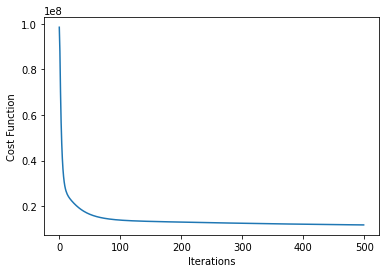

As per the graph, the cost function is decreasing with the number of iterations


In [30]:
# data values for the Boston Housing dataset
boston = pd.DataFrame(Data_boston.data, columns=Data_boston.feature_names)
# boston = (boston - boston.mean())/boston.std()
Y = Data_boston.target
X = pd.DataFrame.to_numpy(boston)
X = list(map(list,list(X)))
A = []
for i in range(len(X)):
    A.append([1]+X[i])
A = np.array(A)
def Cost_Function(W,A,Y):
    a= (Y - np.dot(A,W)).T
    b= Y - np.dot(A,W)
    S = (1/2*len(A))*np.dot(a,b)
    return S

F = len(X[0])  ## F=13
N = 1
Obj1 = Matrix_Multiplication(F,N) ## F=13,N=1
Obj2 = Bias_Layer(N) ## N=1
Obj3 = Mean_Square_Loss() 
itr = 0 
cost = []
while(itr < 500):
    for i in range(len(X)):
        out1 = Obj1.ForwardPass(np.array([X[i]])) ## Forward Pass of Matrix Multiplication
        out2 = Obj2.ForwardPass(out1)  ## Forward Pass of Bias Layer
        out3 = Obj3.ForwardPass(out2,Y[i]) ## Forward Pass of Mean Square Loss

        dy1 = Obj3.BackwardPass()  ## Backward Pass of Mean Square Loss
        dy2 = Obj2.BackwardPass(dy1) ## Backward Pass of Bias Layer
        dy3 = Obj1.BackwardPass(dy2) ## Backward Pass of Matrix Multiplication
    weight = Obj1.W ## Weight of Matrix Multiplication
    bais = Obj2.B  ## Weight of Bias Layer
    W = list(map(float,bais)) + list(map(float,weight))
    c=Cost_Function(W,A,Y)  ## Cost Function value of the network
    cost.append(c) 
    itr+=1
# print(cost)
plt.plot(cost)  ## plot of cost function
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.show()
print('As per the graph, the cost function is decreasing with the number of iterations')